In [2]:
import numpy as np  
import matplotlib.pyplot as plt

In [3]:
x_lower_bound = 0
x_upper_bound = 10
y_lower_bound = 0
y_upper_bound = 10

a = {}

In [4]:
class Island:
    def __init__(self, xcentr = 5, ycentr = 5, radius = 1):
        self.xcentr = xcentr
        self.ycentr = ycentr
        self.radius = radius
    def belongs_to_boarder(self, x, y):
        if ((x - self.xcentr)**2 + (y - self.ycentr)**2 <= radius**2):
            return true
        else:
            return false

In [5]:
class Ship:
    def __init__(self, x = 1, y = 5, vx = 0, vy = 0):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
    def move(self):
        self.x = self.x + self.vx * 1
        self.y = self.y + self.vy * 1
    def getCoords(self):
        return [self.x, self.y]

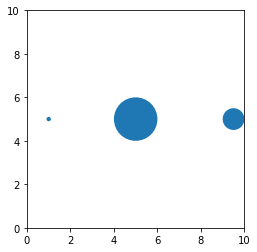

In [7]:
# Creating class for the environment
class Environment:
    def __init__(self):
        super(Environment, self).__init__()
        self.action_space = ['up', 'down', 'left', 'right']
        self.n_actions = len(self.action_space)

        self.build_environment()

        # Dictionaries to draw the final route
        self.d = {}
        self.f = {}

        # Key for the dictionaries
        self.i = 0

        # Writing the final dictionary first time
        self.c = True

        # Showing the steps for longest found route
        self.longest = 0

        # Showing the steps for the shortest route
        self.shortest = 0

    # Function to build the environment
    def build_environment(self):
        self.island = Island()
        
        self.field, self.ax = plt.subplots()
        self.ax.set(xlim=(x_lower_bound, x_upper_bound), ylim=(y_lower_bound, y_upper_bound))
        
        self.ax.set_aspect(1)
        
        self.obstacle_image = plt.Circle((self.island.xcentr, self.island.ycentr), self.island.radius)
        self.ax.add_artist(self.obstacle_image)

        # Final Point 
        self.flag = Island(9.5, 5, 0.5)
        self.flag_image = plt.Circle((self.flag.xcentr, self.flag.ycentr), self.flag.radius)
        self.ax.add_artist(self.flag_image)
        
        self.ship = Ship()
        self.ship_image = plt.Circle((self.ship.x, self.ship.y), 0.1)
        self.ax.add_artist(self.ship_image)

        plt.show()
    """
    # Function to reset the environment and start new Episode
    def reset(self):
        self.update()

        # Updating agent
        self.canvas_widget.delete(self.agent)
        self.ship = self.canvas_widget.create_image(0, pixels * 4, anchor='nw', image=self.robot)

        # # Clearing the dictionary and the i
        self.d = {}
        self.i = 0

        # Return observation
        return self.canvas_widget.coords(self.agent)
    """
    # Function to get the next observation and reward by doing next step
    def step(self, action):
        # Current state of the agent
        state = self.ship.getCoords()
        base_action = np.array([0, 0])

        # Updating next state according to the action
        # Action 'up'
        if action == 0:
            if state[1] <= y_upper_bound:
                base_action[1] += 1
        # Action 'down'
        elif action == 1:
            if state[1] > y_lower_bound:
                base_action[1] -= 1
        # Action right
        elif action == 2:
            if state[0] < x_upper_bound:
                base_action[0] += 1
        # Action left
        elif action == 3:
            if state[0] >= x_lower_bound:
                base_action[0] -= 1

        # Moving the agent according to the action
        self.ship_image = plt.Circle((self.ship.x + base_action[0], self.ship.y + base_action[1]), 0.1)
        self.ax.add_artist(ship_image)

        # Writing in the dictionary coordinates of found route
        self.d[self.i] = self.ship.getCoords()

        # Updating next state
        next_state = self.d[self.i]

        # Updating key for the dictionary
        self.i += 1

        # Calculating the reward for the agent
        if (self.flag.belongs_to_boarder(next_state[0], next_state[1])):
            reward = 1
            done = True
            next_state = 'goal'

            # Filling the dictionary first time
            if self.c == True:
                for j in range(len(self.d)):
                    self.f[j] = self.d[j]
                self.c = False
                self.longest = len(self.d)
                self.shortest = len(self.d)

            # Checking if the currently found route is shorter
            if len(self.d) < len(self.f):
                # Saving the number of steps for the shortest route
                self.shortest = len(self.d)
                # Clearing the dictionary for the final route
                self.f = {}
                # Reassigning the dictionary
                for j in range(len(self.d)):
                    self.f[j] = self.d[j]

            # Saving the number of steps for the longest route
            if len(self.d) > self.longest:
                self.longest = len(self.d)

        elif (self.island.belongs_to_boarder(next_state[0], next_state[1])):
            reward = -1
            done = True
            next_state = 'obstacle'

            # Clearing the dictionary and the i
            self.d = {}
            self.i = 0

        else:
            reward = 0
            done = False

        return next_state, reward, done
    """
    # Function to refresh the environment
    def render(self):
        #time.sleep(0.03)
        self.update()

    # Function to show the found route
    def final(self):
        # Deleting the agent at the end
        self.canvas_widget.delete(self.agent)

        # Showing the number of steps
        print('The shortest route:', self.shortest)
        print('The longest route:', self.longest)

        # Creating initial point
        origin = np.array([20, 180])
        self.initial_point = self.canvas_widget.create_oval(
            origin[0] - 5, origin[1] - 5,
            origin[0] + 5, origin[1] + 5,
            fill='blue', outline='blue')

        # Filling the route
        for j in range(len(self.f)):
            # Showing the coordinates of the final route
            print(self.f[j])
            self.track = self.canvas_widget.create_oval(
                self.f[j][0] + origin[0] - 5, self.f[j][1] + origin[0] - 5,
                self.f[j][0] + origin[0] + 5, self.f[j][1] + origin[0] + 5,
                fill='blue', outline='blue')
            # Writing the final route in the global variable a
            a[j] = self.f[j]


# Returning the final dictionary with route coordinates
# Then it will be used in agent_brain.py
def final_states():
    return a

"""
# This we need to debug the environment
# If we want to run and see the environment without running full algorithm
if __name__ == '__main__':
    env = Environment()
    # env.build_environment()

In [ ]:
class QLearningTable:
    def __init__(self, actions, learning_rate=0.01, reward_decay=0.9, e_greedy=0.9):
        # List of actions
        self.actions = actions
        # Learning rate
        self.lr = learning_rate
        # Value of gamma
        self.gamma = reward_decay
        # Value of epsilon
        self.epsilon = e_greedy
        # Creating full Q-table for all cells
        self.q_table = pd.DataFrame(columns=self.actions, dtype=np.float64)
        # Creating Q-table for cells of the final route
        self.q_table_final = pd.DataFrame(columns=self.actions, dtype=np.float64)

    # Function for choosing the action for the agent
    def choose_action(self, observation):
        # Checking if the state exists in the table
        self.check_state_exist(observation)
        # Selection of the action - 90 % according to the epsilon == 0.9
        # Choosing the best action
        if np.random.uniform() < self.epsilon:
            state_action = self.q_table.loc[observation, :]
            state_action = state_action.reindex(np.random.permutation(state_action.index))
            action = state_action.idxmax()
        else:
            # Choosing random action - left 10 % for choosing randomly
            action = np.random.choice(self.actions)
        return action

    # Function for learning and updating Q-table with new knowledge
    def learn(self, state, action, reward, next_state):
        # Checking if the next step exists in the Q-table
        self.check_state_exist(next_state)

        # Current state in the current position
        q_predict = self.q_table.loc[state, action]

        # Checking if the next state is free or it is obstacle or goal
        if next_state != 'goal' or next_state != 'obstacle':
            q_target = reward + self.gamma * self.q_table.loc[next_state, :].max()
        else:
            q_target = reward

        # Updating Q-table with new knowledge
        self.q_table.loc[state, action] += self.lr * (q_target - q_predict)

        return self.q_table.loc[state, action]

    # Adding to the Q-table new states
    def check_state_exist(self, state):
        if state not in self.q_table.index:
            self.q_table = self.q_table.append(
                pd.Series(
                    [0]*len(self.actions),
                    index=self.q_table.columns,
                    name=state,
                )
            )

    # Printing the Q-table with states
    def print_q_table(self):
        # Getting the coordinates of final route from env.py
        e = final_states()

        # Comparing the indexes with coordinates and writing in the new Q-table values
        for i in range(len(e)):
            state = str(e[i])  # state = '[5.0, 40.0]'
            # Going through all indexes and checking
            for j in range(len(self.q_table.index)):
                if self.q_table.index[j] == state:
                    self.q_table_final.loc[state, :] = self.q_table.loc[state, :]

        print()
        print('Length of final Q-table =', len(self.q_table_final.index))
        print('Final Q-table with values from the final route:')
        print(self.q_table_final)

        print()
        print('Length of full Q-table =', len(self.q_table.index))
        print('Full Q-table:')
        print(self.q_table)

    # Plotting the results for the number of steps
    def plot_results(self, steps, cost):
        #
        f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
        #
        ax1.plot(np.arange(len(steps)), steps, 'b')
        ax1.set_xlabel('Episode')
        ax1.set_ylabel('Steps')
        ax1.set_title('Episode via steps')

        #
        ax2.plot(np.arange(len(cost)), cost, 'r')
        ax2.set_xlabel('Episode')
        ax2.set_ylabel('Cost')
        ax2.set_title('Episode via cost')

        plt.tight_layout()  # Function to make distance between figures

        #
        plt.figure()
        plt.plot(np.arange(len(steps)), steps, 'b')
        plt.title('Episode via steps')
        plt.xlabel('Episode')
        plt.ylabel('Steps')

        #
        plt.figure()
        plt.plot(np.arange(len(cost)), cost, 'r')
        plt.title('Episode via cost')
        plt.xlabel('Episode')
        plt.ylabel('Cost')

        # Showing the plots
        plt.show()